<a href="https://colab.research.google.com/github/AntBap23/Demand-Model/blob/main/TimeSeriesModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Model Project

In [ ]:
#Basic imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from google.colab import files



In [ ]:
#read in data

df = pd.read_csv('retail_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [ ]:
#fix week column

df[['Day', 'Month', 'Year']] = df['week'].str.split('/', expand=True)

In [ ]:
df = df.drop(columns=['week'])
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Day,Month,Year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


Preprocessing

In [ ]:
#make dummy variables for each store

df_store = pd.get_dummies(df['store_id'], prefix='store')
df_sku = pd.get_dummies(df['sku_id'],prefix='product')
df = pd.concat([df, df_store, df_sku], axis=1)
df = df.drop(columns=['store_id', 'sku_id'])
df

,record_ID,total_price,base_price,is_featured_sku,is_display_sku,units_sold,Day,Month,Year,store_8023,...,product_320485,product_327492,product_378934,product_398721,product_545621,product_546789,product_547934,product_600934,product_673209,product_679023
0,1,99.0375,111.8625,0,0,20,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
1,2,99.0375,99.0375,0,0,28,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
2,3,133.9500,133.9500,0,0,19,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
3,4,133.9500,133.9500,0,0,44,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
4,5,141.0750,141.0750,0,0,52,17,01,11,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,235.8375,235.8375,0,0,38,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150146,212639,235.8375,235.8375,0,0,30,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150147,212642,357.6750,483.7875,1,1,31,09,07,13,False,...,False,False,False,False,False,False,False,False,False,False
150148,212643,141.7875,191.6625,0,1,12,09,07,13,False,...,False,False,False,False,False,False,True,False,False,False


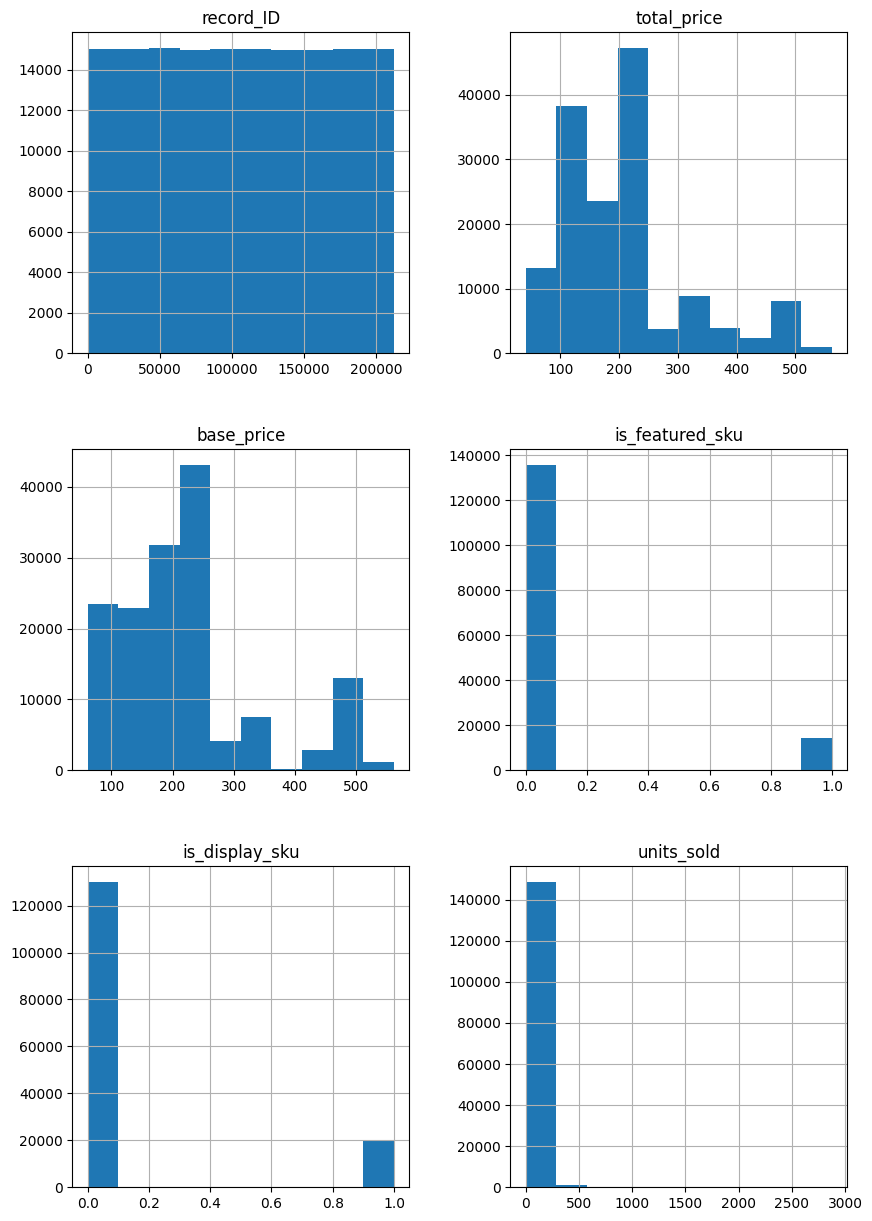

In [ ]:
#see variable distributions

df.hist(figsize=(10,15))
plt.show()

In [ ]:

# Calculate the 0.99 quantile for 'units_sold'
quantile_99 = df['units_sold'].quantile(0.99)

# Drop rows where 'units_sold' is above the 0.99 quantile
df = df[df['units_sold'] <= quantile_99]

#check max units sold
df['units_sold'].max()

283

In [ ]:

# Drop rows with any null values in any column
df = df.dropna()

Model Building



random forest regressor

In [ ]:
#creat Random Forest model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns = ['units_sold'], axis=1)
y = df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=100, max_depth=None)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#calulate root_mean_squared error


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Root Mean Squared Error: 17.843641087356048
R-squared: 0.8301427187186576


In [ ]:
model.score(X_test, y_test)

0.8301427187186576

In [ ]:
#using grid search to enhance the model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

In [ ]:
# Metrics for the best model

best_mse = mean_squared_error(y_test, y_best_pred)
best_rmse = np.sqrt(best_mse)
best_r2 = r2_score(y_test, y_best_pred)

print("Best Model - Root Mean Squared Error:", best_rmse)
print("Best Model - R-squared:", best_r2)


Best Model - Root Mean Squared Error: 17.122930482231364
Best Model - R-squared: 0.8435868014179019


Gradient Boosting model

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth = 6, subsample=0.8, validation_fraction=0.2, random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_rmse = np.sqrt(gb_mse)
gb_r2 = r2_score(y_test, gb_y_pred)

print("Gradient Boosting - Root Mean Squared Error:", gb_rmse)
print("Gradient Boosting - R-squared:", gb_r2)
print("Gradient Boosting model score", gb_model.score(X_test,y_test))

evaluate model using actual prediction scores

In [ ]:
new_df = pd.read_csv('retail_data.csv')
new_df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [ ]:
# Calculate the 0.99 quantile for 'units_sold'
quantile_99p = new_df['units_sold'].quantile(0.99)

# Drop rows where 'units_sold' is above the 0.99 quantile
new_df = new_df[new_df['units_sold'] <= quantile_99p]

In [ ]:
# Delete the row at index 148652
new_df = new_df.drop(index=148652)
new_df = new_df.reset_index(drop=True)

new_df

In [ ]:
#create new

new_df['RFG_prediction'] = best_model.predict(X)
new_df['GB_prediction'] = gb_model.predict(X)

new_df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,RFG_prediction,GB_prediction
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,37.354,23.680626
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,30.638,34.133648
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,22.090,19.778326
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,40.582,28.634485
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,63.696,47.684709


In [ ]:
#turn to csv

new_df.to_csv('predictions.csv', encoding = 'utf-8-sig')
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>